# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

%matplotlib inline

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df0 = pd.read_csv('store_sharing.csv')
df = df0.copy()

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [4]:
df_null_values = df.isnull().sum().sum()

if df_null_values != 0:
    print('There are {} null values in DataFrame.'.format(df_null_values))
else:
    print('DataFrame is completely clear!')

DataFrame is completely clear!


In [5]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
df_dup_values = df.duplicated().sum()

if df_dup_values != 0:
    print('There are {} duplicated values in DataFrame.'.format(df_dup_values))
else:
    print('There is no duplicated values!')

There is no duplicated values!


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [9]:
df['year-month'] = df.index.strftime("%Y-%m")
df['year'] = df.index.year
df["month"] =  df.index.month_name()
df["day_of_month"] =  df.index.day
df["day_of_week"] =  df.index.dayofweek
df["day_of_name"] = df.index.day_name()
df["hour"] = df.index.hour

In [10]:
weather_code = {1: 'Clear', 2: 'Scattered Clouds', 3: 'Broken Clouds', 7: 'Rain', 
                4: 'Cloudy', 26: 'Snowfall', 10: 'Thunderstorm'}
holiday      = {1: 'Holiday', 0: 'Workday'}
weekend      = {1: 'Weekend', 0: 'Weekday'} 
season       = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

In [11]:
df['weather_code'] = df['weather_code'].map(weather_code)
df['is_holiday']   = df['is_holiday'].map(holiday)
df['is_weekend']   = df['is_weekend'].map(weekend)
df['season'] = df['season'].map(season)

In [12]:
df.sample(4)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2016-01-01 23:00:00,135,8.5,5.5,87.0,20.0,Rain,Holiday,Weekday,Winter,2016-01,2016,January,1,4,Friday,23
2016-09-09 08:00:00,4596,18.5,18.5,80.5,16.0,Scattered Clouds,Workday,Weekday,Fall,2016-09,2016,September,9,4,Friday,8
2016-10-14 17:00:00,3727,13.0,13.0,69.5,19.0,Scattered Clouds,Workday,Weekday,Fall,2016-10,2016,October,14,4,Friday,17
2016-03-06 09:00:00,568,4.0,0.5,75.0,17.5,Scattered Clouds,Workday,Weekend,Spring,2016-03,2016,March,6,6,Sunday,9


<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


### distribution of Season: 

In [13]:
season_value_counts = df.season.value_counts()
season_value_counts

Spring    4394
Summer    4387
Winter    4330
Fall      4303
Name: season, dtype: int64

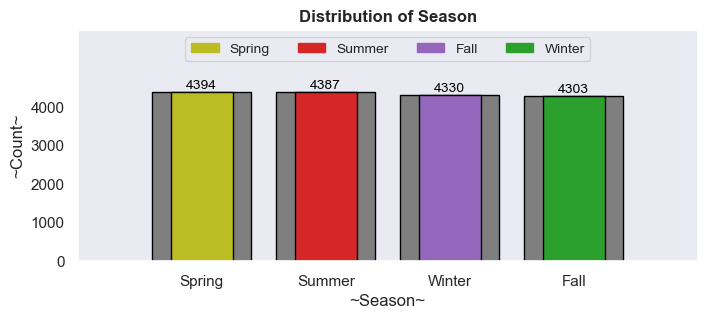

In [53]:
plt.figure(figsize=(8, 3))

barp = plt.bar(season_value_counts.index, season_value_counts.values, label=season_value_counts.index, 
               color=['tab:gray'], edgecolor="black", linewidth=1)
plt.bar(season_value_counts.index, season_value_counts.values, label=season_value_counts.index, 
        color=["tab:olive", "tab:red", "tab:purple", "tab:green"],
        width=0.5, edgecolor="black", linewidth=1)

plt.ylabel('~Count~')
plt.xlabel('~Season~')
plt.xlim([-1, 4])
plt.ylim([0, 6000])
plt.yticks([0, 1000, 2000, 3000, 4000])
plt.bar_label(barp, labels=season_value_counts.values, label_type="edge", size=10, color="black", padding=0)

colors = {'Spring':'tab:olive', 'Summer':'tab:red', 'Fall':'tab:purple', 'Winter':'tab:green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc="upper center", ncols=4, fontsize='small')

plt.title("Distribution of Season", weight='bold')

plt.show()

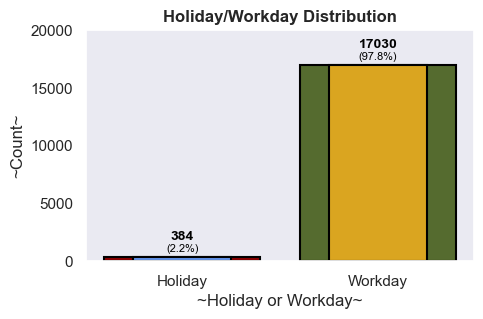

In [66]:
x = df.is_holiday.value_counts().sort_values().index
y = df.is_holiday.value_counts().sort_values().values

percantage_list = [1, 2]
percantage_list[0] = '(' + str(round(100 * (y[0] / y.sum()), 1)) + '%)'
percantage_list[1] = '(' + str(round(100 * (y[1] / y.sum()), 1)) + '%)'

plt.figure(figsize=(5, 3))

plt.bar(x, y, color=['darkred', 'DarkOliveGreen'], edgecolor="black", lw=1.5)
barplots = plt.bar(x, y, color=['CornflowerBlue', 'GoldenRod'], edgecolor="black", 
                   lw=1.5, width=0.5)

plt.ylabel('~Count~')
plt.xlabel('~Holiday or Workday~')
plt.ylim((0, 20_000))
plt.yticks([0, 5000, 10000, 15000, 20000])

plt.bar_label(barplots, labels=y, label_type="edge", size=10, color="black", padding=10, weight='bold')
plt.bar_label(barplots, labels=percantage_list, label_type="edge", size=8, color="black", padding=2)

plt.title('Holiday/Workday Distribution', weight='bold')
plt.show()

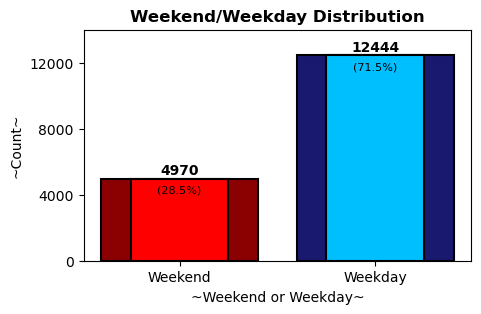

In [16]:
x = df.is_weekend.value_counts().sort_values().index
y = df.is_weekend.value_counts().sort_values().values

percantage_list = [1, 2]
percantage_list[0] = '(' + str(round(100 * (y[0] / y.sum()), 1)) + '%)'
percantage_list[1] = '(' + str(round(100 * (y[1] / y.sum()), 1)) + '%)'
percantage_list

plt.figure(figsize=(5, 3))

plt.bar(x, y, color=['darkred', 'MidnightBlue'], edgecolor="black", lw=1.5)
barplots = plt.bar(x, y, color=['red', 'deepskyblue'], edgecolor="black", 
                   lw=1.5, width=0.5)
plt.ylabel('~Count~')
plt.xlabel('~Weekend or Weekday~')
plt.ylim((0, 14_000))
plt.yticks([0, 4000, 8000, 12000])

plt.bar_label(barplots, labels=y, label_type="edge", size=10, color="black", padding=1, weight='bold')
plt.bar_label(barplots, labels=percantage_list, label_type="edge", size=8, color="black", padding=-12)

plt.title('Weekend/Weekday Distribution', weight='bold')

plt.show()


    1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
    2 = scattered clouds / few clouds
    3 = Broken clouds
    4 = Cloudy
    7 = Rain/ light Rain shower/ Light rain
    10 = rain with thunderstorm
    26 = snowfall
    94 = Freezing Fog


In [17]:
df_weather_code = df0['weather_code'].value_counts()
df_weather_code = pd.DataFrame({'Code': df_weather_code.index, 'Count': df_weather_code.values}, index=range(7))
df_weather_code.Code = df_weather_code.Code.astype('int').astype('str')
df_weather_code['Percantage'] = df_weather_code['Count'] / df_weather_code.Count.sum() * 100
df_weather_code['Percantage'] = '(' + round(df_weather_code['Percantage'], 1).astype('str') + '%)'
df_weather_code

,Code,Count,Percantage
0,1,6150,(35.3%)
1,2,4034,(23.2%)
2,3,3551,(20.4%)
3,7,2141,(12.3%)
4,4,1464,(8.4%)
5,26,60,(0.3%)
6,10,14,(0.1%)


In [18]:
legend_list = ['1: Clear', '2: Scattered Clouds', '3: Broken Clouds', '7: Rain', 
               '4: Cloudy', '26: Snowfall', '10: Thunderstorm']

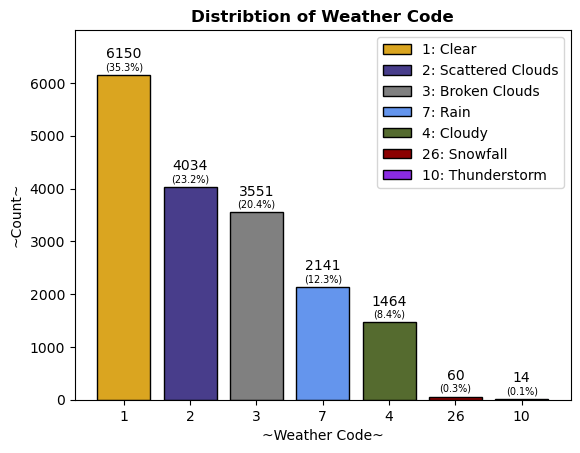

In [19]:
color_palette = ['GoldenRod', 'DarkSlateBlue', 'gray', 'CornflowerBlue', 'DarkOliveGreen', 'darkred', 'BlueViolet']

barp = plt.bar(df_weather_code.Code, df_weather_code.Count, color=color_palette, label=legend_list, edgecolor="black", lw=1)

plt.bar_label(barp, labels=df_weather_code.Count, label_type="edge", size=10, color="black", padding=10)
plt.bar_label(barp, labels=df_weather_code.Percantage, label_type="edge", size=7, color="black", padding=2)

plt.ylabel('~Count~')
plt.xlabel('~Weather Code~')
plt.ylim([0, 7000])
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])

plt.title('Distribtion of Weather Code', weight='bold')

plt.legend()

plt.show()

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [20]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code     object
is_holiday       object
is_weekend       object
season           object
year-month       object
year              int64
month            object
day_of_month      int64
day_of_week       int64
day_of_name      object
hour              int64
dtype: object

<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [21]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,Workday,Weekend,Winter,2015-01,2015,January,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Workday,Weekend,Winter,2015-01,2015,January,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Workday,Weekend,Winter,2015-01,2015,January,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Workday,Weekend,Winter,2015-01,2015,January,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Workday,Weekend,Winter,2015-01,2015,January,4,6,Sunday,4


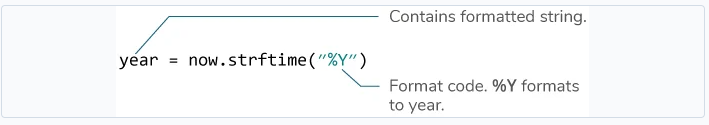

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [22]:
df_new = df0.copy()

In [23]:
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])
df_new = df_new.set_index('timestamp')

In [24]:
df_new['year-month'] = df_new.index.strftime("%Y-%m")
df_new['year'] = df_new.index.year
df_new["month"] =  df_new.index.month
df_new["day_of_month"] =  df_new.index.day
df_new["day_of_week"] =  df_new.index.dayofweek
df_new["day_of_name"] = df_new.index.day_name()
df_new["hour"] = df_new.index.hour

In [25]:
df_new.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,4


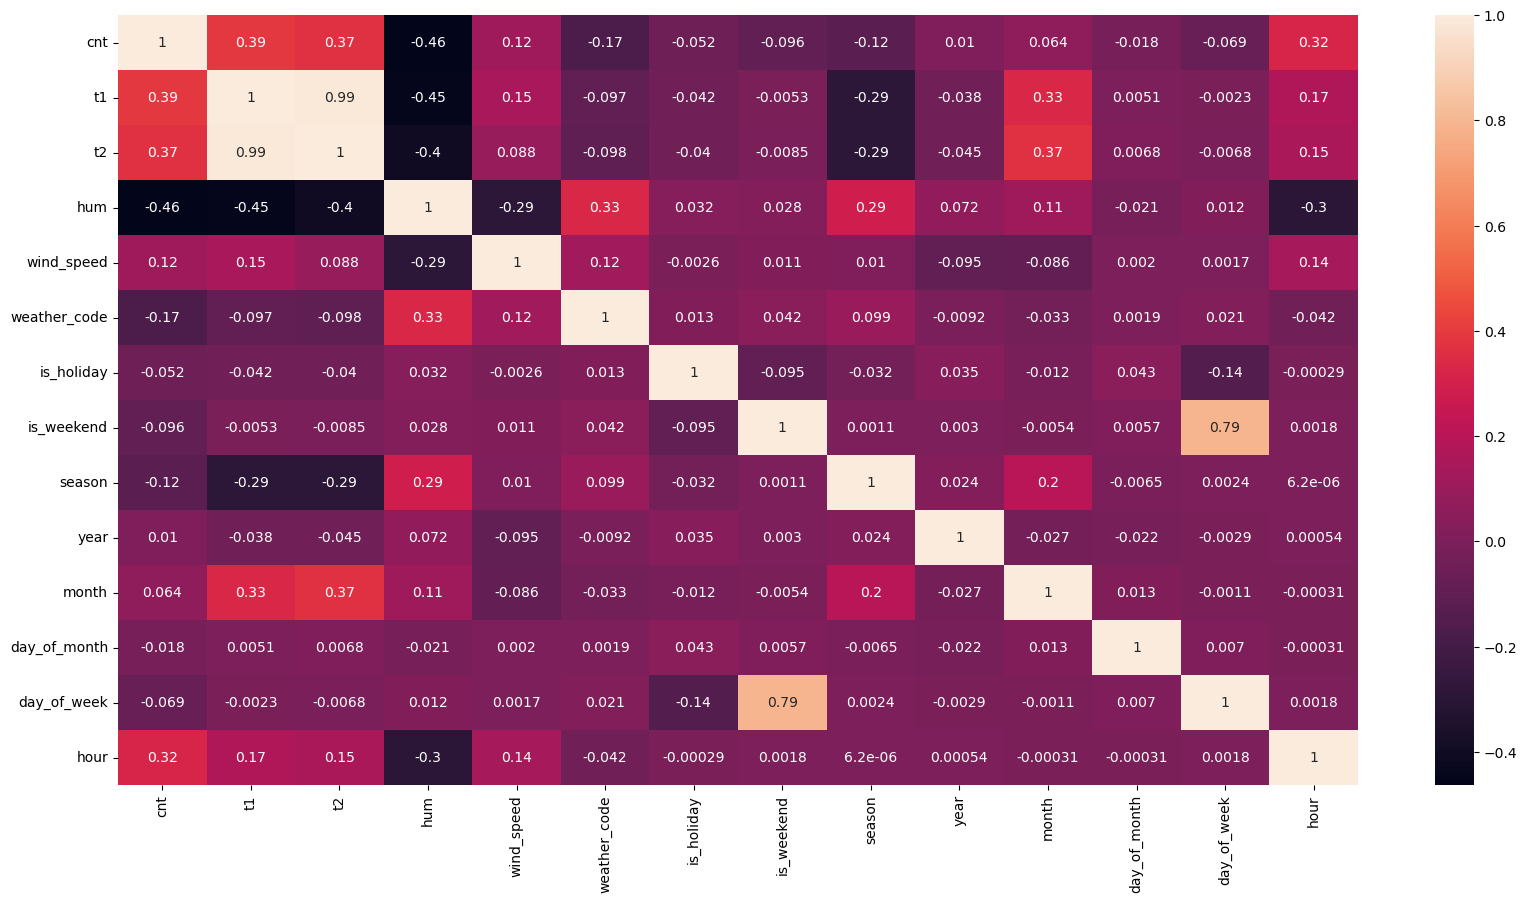

In [26]:
df_corr = df_new.select_dtypes('number').corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,  annot=True)

plt.show()

In [27]:
df_corr_cnt = df_corr[["cnt"]].sort_values(by="cnt", ascending=False) 
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


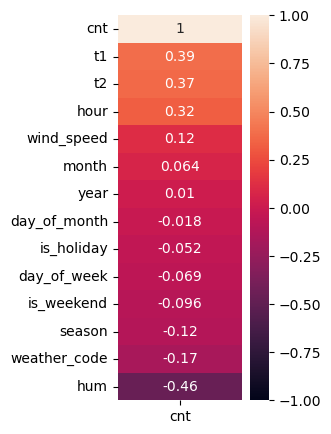

In [28]:
plt.figure(figsize=(2,5))
sns.heatmap(df_corr_cnt, annot=True, vmin=-1, vmax=1)

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

In [29]:
df_corr_target = df_corr_cnt['cnt']
df_corr_target

cnt             1.000000
t1              0.388798
t2              0.369035
hour            0.324423
wind_speed      0.116295
month           0.063757
year            0.010046
day_of_month   -0.017887
is_holiday     -0.051698
day_of_week    -0.068688
is_weekend     -0.096499
season         -0.116180
weather_code   -0.166633
hum            -0.462901
Name: cnt, dtype: float64

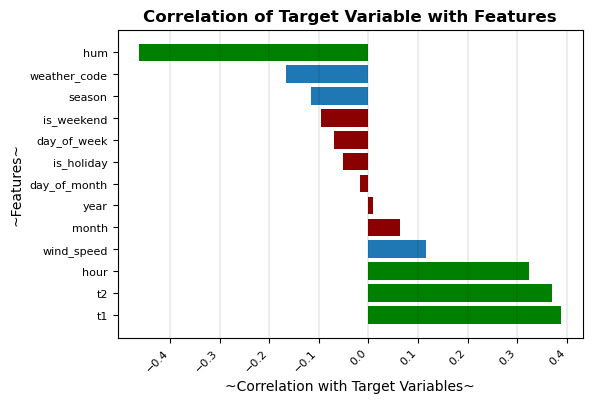

In [30]:
my_color=['green', 'green', 'green', 'tab:blue', 'darkred', 'darkred', 'darkred', 
       'darkred', 'darkred', 'darkred', 'tab:blue', 'tab:blue', 'green']

plt.figure(figsize=(6, 4))
x = df_corr_target.index[1:]
y = df_corr_target.values[1:]

barp = plt.barh(x, y, color=my_color)
plt.xticks([-0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4], rotation=45, ha='right', size=8)
plt.yticks(size=8)
plt.grid(axis='x', color='k', lw=0.1)
plt.ylabel('~Features~')
plt.xlabel('~Correlation with Target Variables~')
plt.title('Correlation of Target Variable with Features', weight='bold')

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

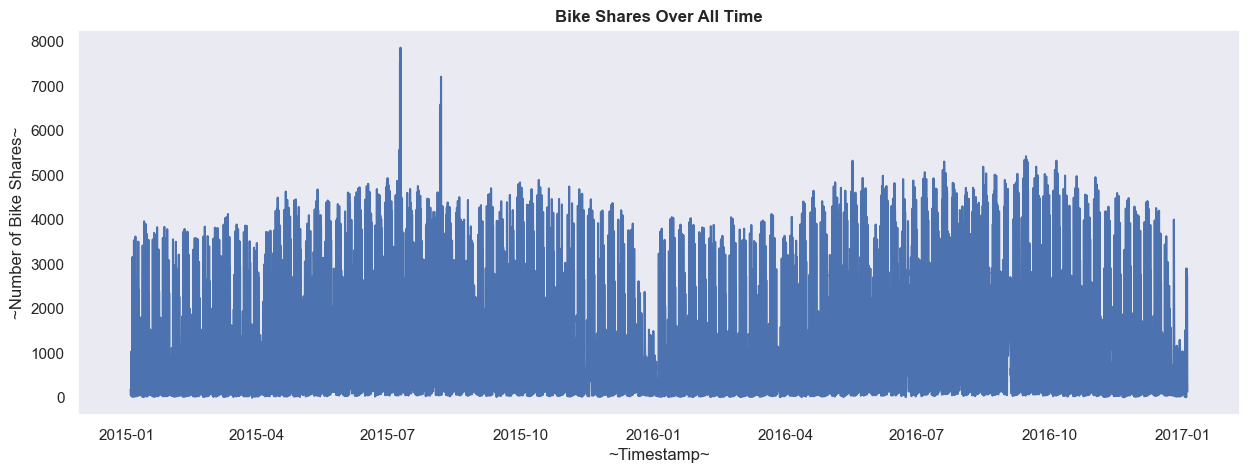

In [31]:
sns.set(style = "dark")

plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y=df.cnt)

plt.title('Bike Shares Over All Time', weight='bold')
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Timestamp~', fontsize=12)

plt.show()

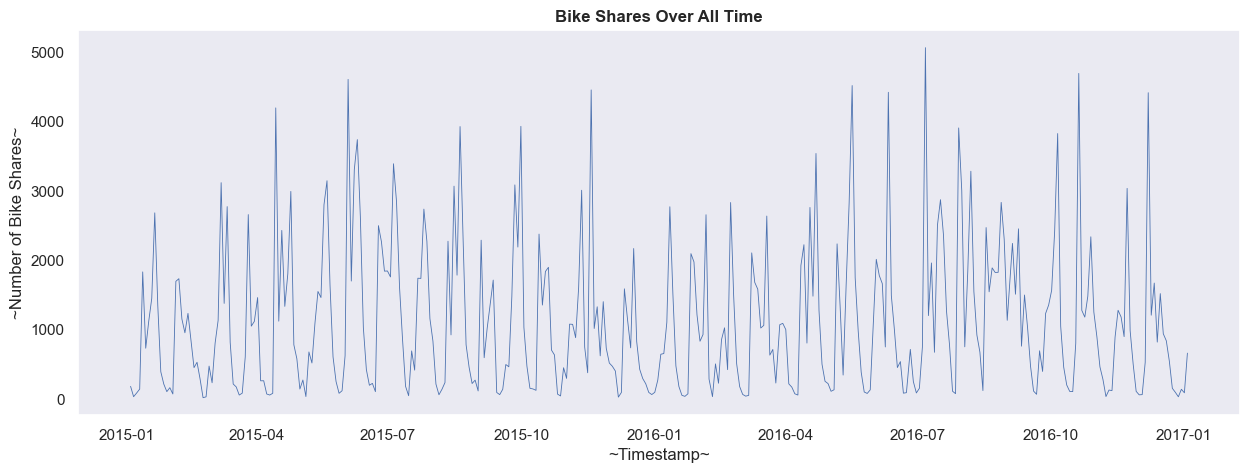

In [32]:
sns.set(style = "dark")
plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index[::50], y=df.cnt[::50], lw=0.6)
plt.title('Bike Shares Over All Time', weight='bold')
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Timestamp~', fontsize=12);

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [33]:
months = ["January", "February", "March", "April", "May", "June",
           "July", "August", "September", "October", "November", "December"]

In [34]:
grp_year_month = pd.DataFrame(df.groupby("year-month").cnt.sum())
grp_year_month

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


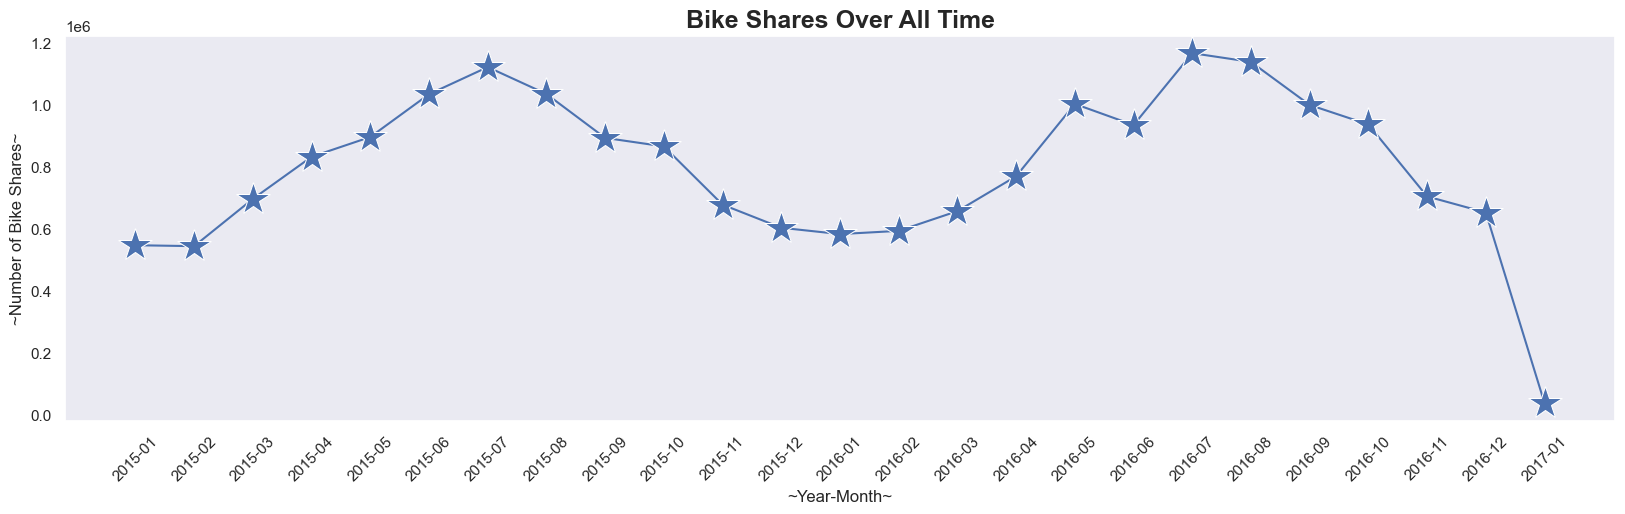

In [35]:
sns.set(style='dark')
plt.figure(figsize=(20,5))
sns.lineplot(x="year-month", y="cnt", data = grp_year_month, markers=True, markersize=25, marker='*')
plt.xticks(rotation=45)
plt.title('Bike Shares Over All Time', weight='bold', fontsize=18)
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Year-Month~', fontsize=12);

In [36]:
df_2015 = df.loc[df['year']==2015, :]
df_2016 = df.loc[df['year']==2016, :]
df_2017 = df.loc[df['year']==2017, :]

grp_month_2015 = df_2015.groupby('month')['cnt'].mean()
grp_month_2015 = grp_month_2015[months]

grp_month_2016 = df_2016.groupby('month')['cnt'].mean()
grp_month_2016 = grp_month_2016[months]

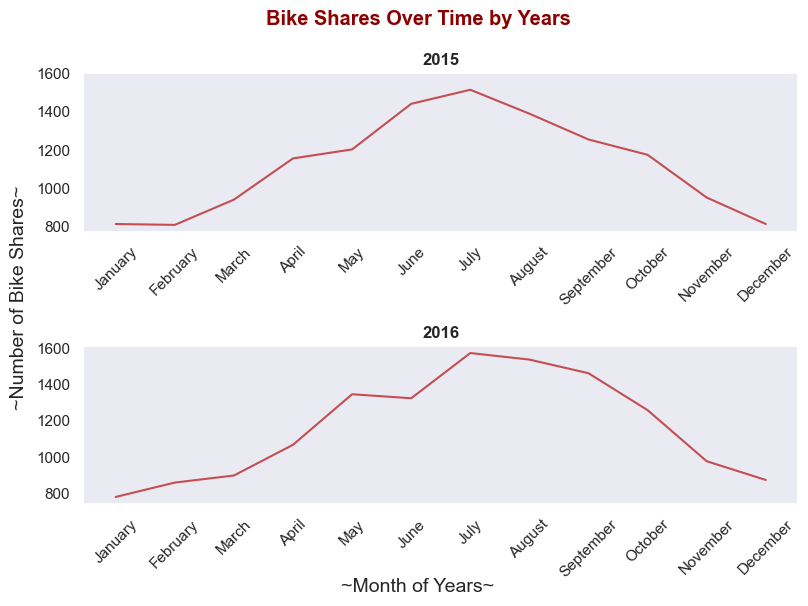

In [37]:
sns.set(style='dark')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

ax[0].plot(grp_month_2015.index, grp_month_2015.values, color='r')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('2015', weight='bold')
ax[0].set_yticks([800, 1000, 1200, 1400, 1600])

ax[1].plot(grp_month_2016.index, grp_month_2016.values, color='r')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('2016', weight='bold')

fig.suptitle('Bike Shares Over Time by Years', weight='bold', color='darkred')
plt.tight_layout()

fig.text(-0.01, 0.5, '~Number of Bike Shares~', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.01, '~Month of Years~', ha='center', fontsize=14)

plt.show()

In [38]:
df_2015_2016 = pd.concat([df_2015, df_2016], axis=0)
grp_month_2015_2016 = df_2015_2016.groupby('month')['cnt'].mean()
grp_month_2015_2016 = grp_month_2015_2016[months]

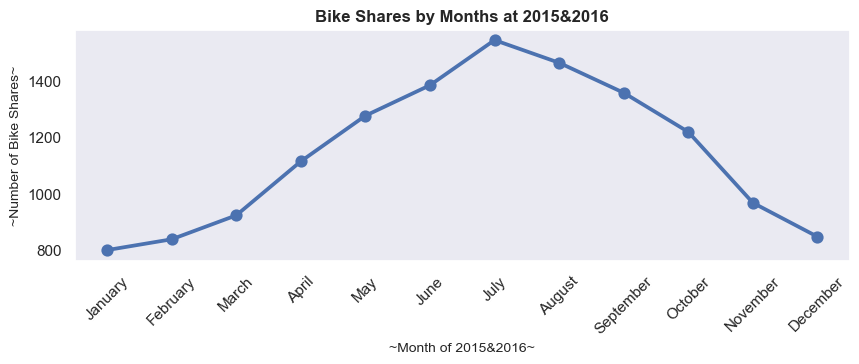

In [39]:
sns.set(style='dark')
plt.figure(figsize=(10, 3))
sns.pointplot(x=grp_month_2015_2016.index, y=grp_month_2015_2016.values)
plt.xticks(rotation=45)
plt.title('Bike Shares by Months at 2015&2016', weight='bold')
plt.ylabel('~Number of Bike Shares~', fontsize=10)
plt.xlabel('~Month of 2015&2016~', fontsize=10)
plt.show()

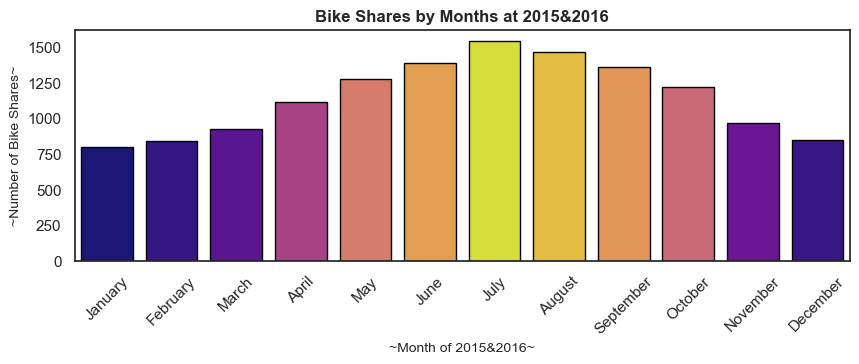

In [40]:
sns.set(style='white')
plt.figure(figsize=(10,3))
sns.barplot(x=grp_month_2015_2016.index, y=grp_month_2015_2016.values, 
            hue=grp_month_2015_2016.values, legend=False, palette='plasma', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Bike Shares by Months at 2015&2016', weight='bold')
plt.ylabel('~Number of Bike Shares~', fontsize=10)
plt.xlabel('~Month of 2015&2016~', fontsize=10)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

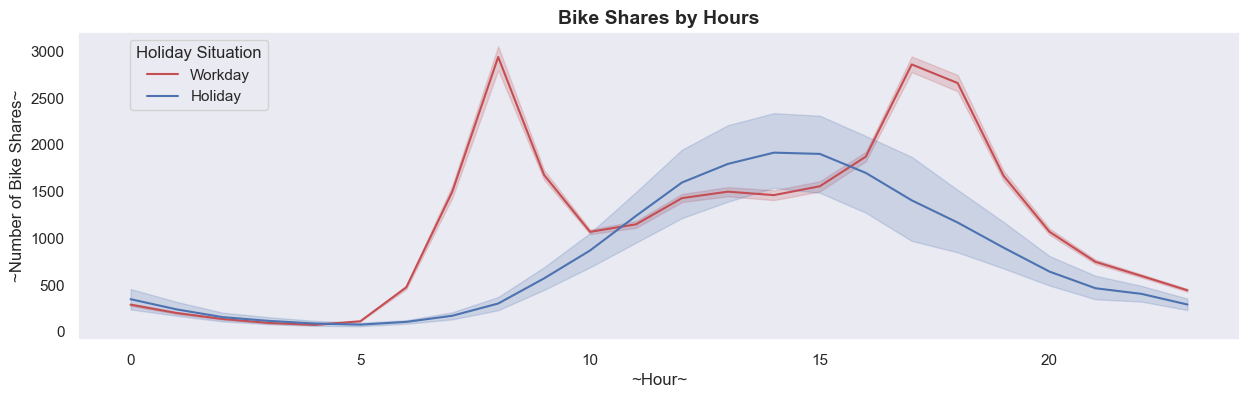

In [41]:
sns.set(style='dark')
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_holiday", palette=['r', 'b'])

plt.legend(title='Holiday Situation', bbox_to_anchor=(0.17, 1))

plt.title('Bike Shares by Hours', weight='bold', fontsize=14)
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Hour~', fontsize=12)
plt.show()

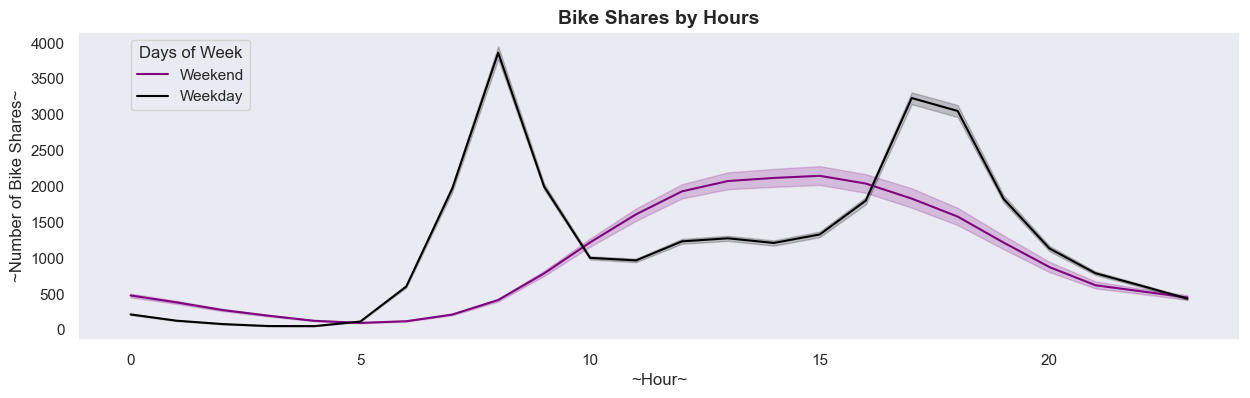

In [42]:
sns.set(style='dark')
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_weekend", palette=['purple', 'black'])

plt.legend(title='Days of Week', bbox_to_anchor=(0.155, 1))
plt.title('Bike Shares by Hours', weight='bold', fontsize=14)
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Hour~', fontsize=12)
plt.show()

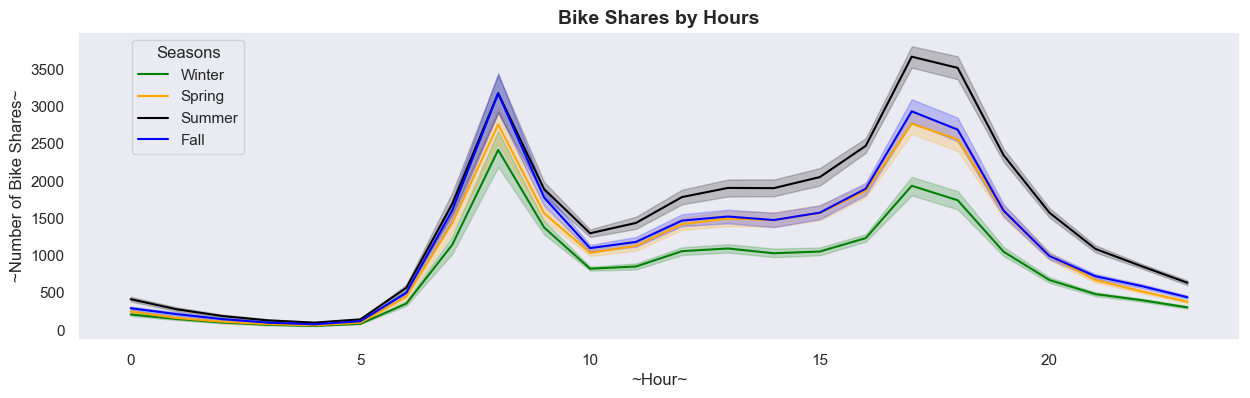

In [43]:
sns.set(style='dark')
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="season", palette=['green', 'orange', 'black', 'blue'])

plt.legend(title='Seasons', bbox_to_anchor=(0.15, 1))
plt.title('Bike Shares by Hours', weight='bold', fontsize=14)
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Hour~', fontsize=12)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

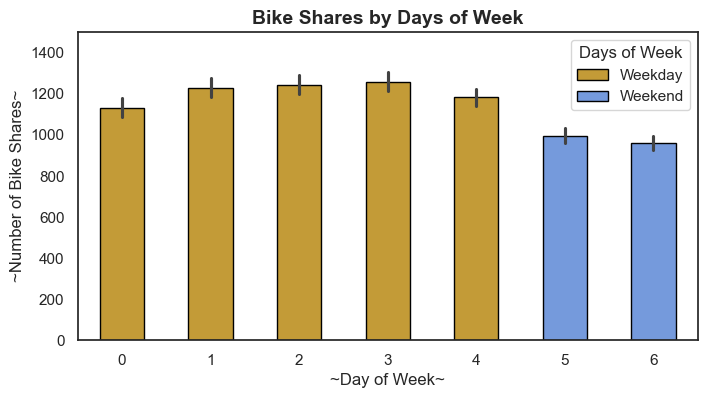

In [44]:
sns.set(style='white')
plt.figure(figsize=(8, 4))
sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_weekend", width=0.5, 
            palette=['GoldenRod', 'CornflowerBlue'], edgecolor='black')

plt.ylim((0, 1500))

plt.legend(title='Days of Week')

plt.title('Bike Shares by Days of Week', weight='bold', fontsize=14)
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Day of Week~', fontsize=12)
plt.show()

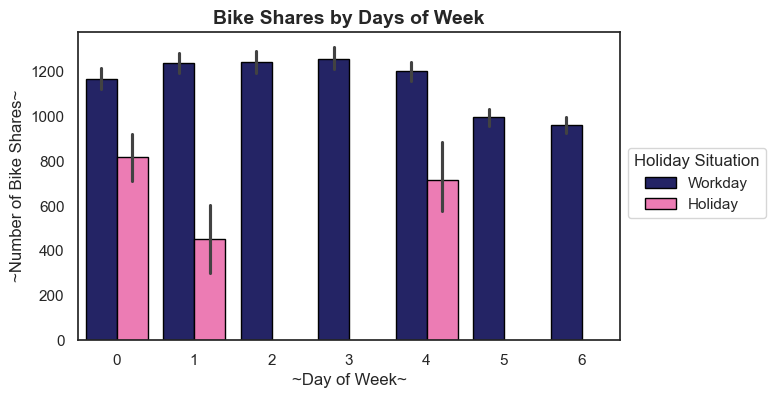

In [45]:
sns.set(style='white')
plt.figure(figsize=(7,4))
sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_holiday", 
            palette=['midnightblue', 'hotpink'], edgecolor='black')

plt.legend(title='Holiday Situation', bbox_to_anchor=(1, 0.65))

plt.title('Bike Shares by Days of Week', weight='bold', fontsize=14)
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Day of Week~', fontsize=12)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

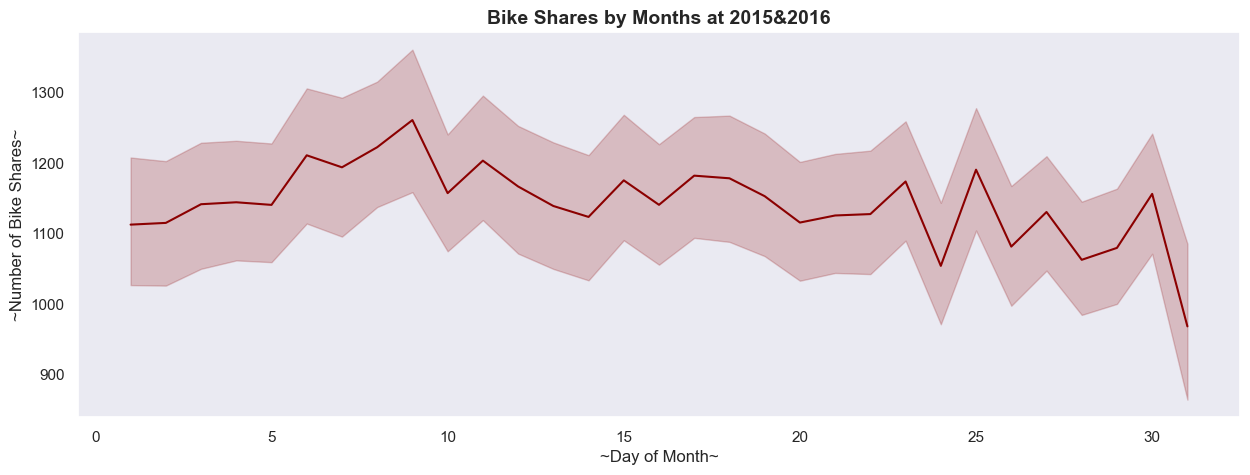

In [46]:
sns.set(style='dark')
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_2015_2016, x="day_of_month", y="cnt", color="darkred")
plt.title('Bike Shares by Months at 2015&2016', weight='bold', fontsize=14)
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Day of Month~', fontsize=12);

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

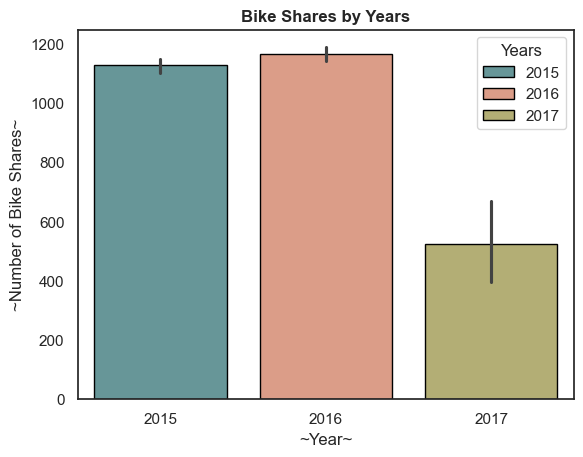

In [47]:
sns.set(style='white')
sns.barplot(data=df, x="year", y="cnt", hue='year', palette=['cadetblue', 'darksalmon', 'darkkhaki'], edgecolor='black')

plt.legend(title='Years')
plt.title('Bike Shares by Years', weight='bold')
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Year~', fontsize=12)
plt.show()

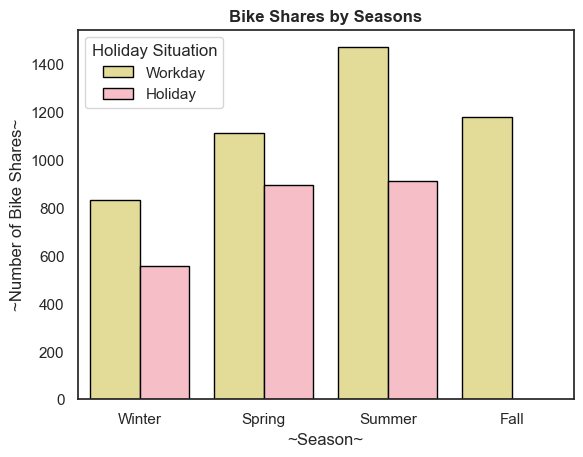

In [48]:
sns.set(style='white')
sns.barplot(data=df, x="season", y="cnt", hue='is_holiday', errorbar=('ci', 0), 
            edgecolor='black', palette=['khaki', 'lightpink'])


plt.legend(title='Holiday Situation', loc='upper left')
plt.title('Bike Shares by Seasons', weight='bold')
plt.ylabel('~Number of Bike Shares~', fontsize=12)
plt.xlabel('~Season~', fontsize=12)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [49]:
df_weekend = df['is_weekend'].value_counts()

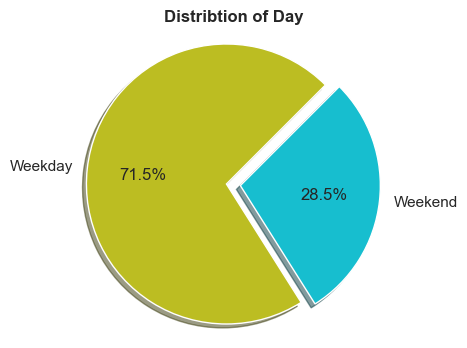

In [50]:
sns.set(style='white')
plt.figure(figsize=(5, 4))
my_explode = [0., 0.1]
plt.pie(x=df_weekend.values, labels=df_weekend.index, explode=my_explode, autopct='%1.1f%%',
        colors=['tab:olive', 'tab:cyan'], shadow=True, startangle=45)
plt.axis("equal")

plt.title("Distribtion of Day", weight='bold')

plt.show()

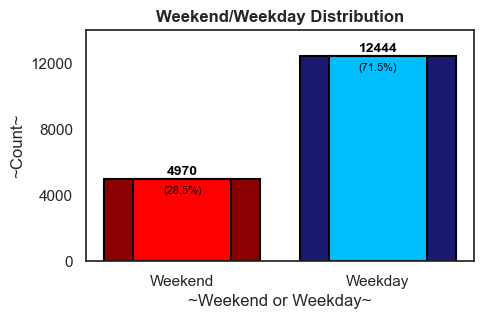

In [51]:
sns.set(style='white')
x = df.is_weekend.value_counts().sort_values().index
y = df.is_weekend.value_counts().sort_values().values

percantage_list = [1, 2]
percantage_list[0] = '(' + str(round(100 * (y[0] / y.sum()), 1)) + '%)'
percantage_list[1] = '(' + str(round(100 * (y[1] / y.sum()), 1)) + '%)'
percantage_list

plt.figure(figsize=(5, 3))

plt.bar(x, y, color=['darkred', 'MidnightBlue'], edgecolor="black", lw=1.5)
barplots = plt.bar(x, y, color=['red', 'deepskyblue'], edgecolor="black", 
                   lw=1.5, width=0.5)
plt.ylabel('~Count~')
plt.xlabel('~Weekend or Weekday~')
plt.ylim((0, 14_000))
plt.yticks([0, 4000, 8000, 12000])

plt.bar_label(barplots, labels=y, label_type="edge", size=10, color="black", padding=1, weight='bold')
plt.bar_label(barplots, labels=percantage_list, label_type="edge", size=8, color="black", padding=-12)

plt.title('Weekend/Weekday Distribution', weight='bold')

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

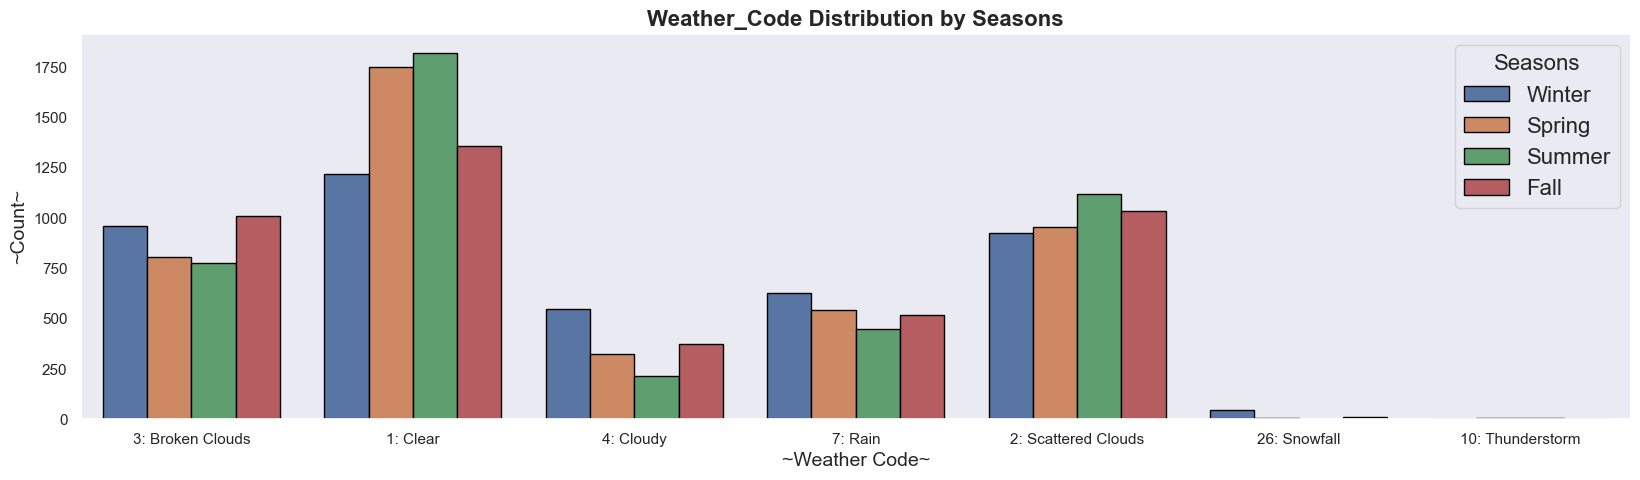

In [52]:
sns.set(style='dark')
weather_code = {'Clear': '1: Clear', 'Scattered Clouds': '2: Scattered Clouds', 'Broken Clouds': '3: Broken Clouds', 
                'Rain': '7: Rain', 'Cloudy': '4: Cloudy', 'Snowfall': '26: Snowfall', 'Thunderstorm': '10: Thunderstorm'}
df_ = df.copy()
df_['weather_code'] = df_['weather_code'].map(weather_code)

plt.figure(figsize=(20, 5))
sns.countplot(data=df_, x='weather_code', hue='season', edgecolor='black')

plt.legend(title='Seasons', fontsize=16, title_fontsize=16)
plt.title('Weather_Code Distribution by Seasons', weight='bold', fontsize=16)
plt.ylabel('~Count~', fontsize=14)
plt.xlabel('~Weather Code~', fontsize=14)
plt.show()

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

### Conclusion 1: Weekday Effect

📢 People tend to share bikes more during the weekdays than weekends.

    Average Number of Bike Shares:
        - Weekday: 1209
        - Weekend: 977

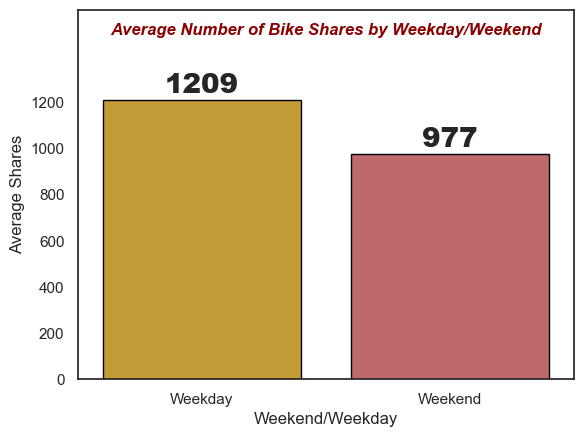

In [149]:
grp_week = df.groupby('is_weekend')['cnt'].agg(['count', 'sum', 'mean']).reset_index()
grp_week.columns = ['Weekend/Weekday', 'Number of Shares', 'Total Shares', 'Average Shares']
grp_week['Average Shares'] = grp_week['Average Shares'].astype(int)
# plt.figure(figsize=(10, 4))
sns.set(style='white')

ax = sns.barplot(data=grp_week, x='Weekend/Weekday', y='Average Shares', 
                  hue='Weekend/Weekday', palette=['goldenrod', 'indianred'], edgecolor='black')

plt.ylim(0, 1600)
plt.yticks(np.arange(0, 1300, 200))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                weight='900', fontsize= 20)
plt.title('Average Number of Bike Shares by Weekday/Weekend', pad=-18, color='darkred', 
          weight='bold', style='italic')
plt.show()

### Conclusion 2: Season Effect

📢 Best season for Bike Shares: **Summer**

📢 Worst season for Bike Shares: **Winter**

    Average Number of Bike Shares:
        - Summer: 1464
        - Winter: 821

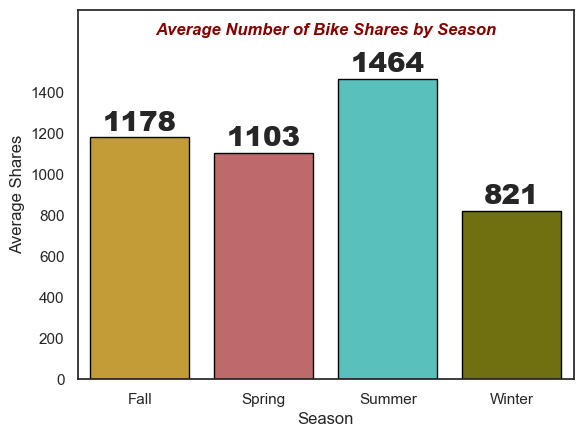

In [156]:
grp_season = df.groupby('season')['cnt'].agg(['count', 'sum', 'mean']).reset_index()
grp_season.columns = ['Season', 'Number of Shares', 'Total Shares', 'Average Shares']
grp_season['Average Shares'] = grp_season['Average Shares'].astype(int)

sns.set(style='white')

ax = sns.barplot(data=grp_season, x='Season', y='Average Shares', 
                  hue='Season', palette=['goldenrod', 'indianred', 'MediumTurquoise', 'Olive'], edgecolor='black')

plt.ylim(0, 1800)
plt.yticks(np.arange(0, 1600, 200))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                weight='900', fontsize= 20)
plt.title('Average Number of Bike Shares by Season', pad=-18, color='darkred', 
          weight='bold', style='italic')
plt.show()

### Conclusion 3: Weather Effect

Weather codes can be divided into two types:

    1. Mild Weather = ['Broken Clouds', 'Clear', 'Cloudy', 'Scattered Clouds']
    2. Severe Weather = ['Rain', 'Snowfall', 'Thunderstorm']
    
📢 When we analyze bike shares by the new weather types, we'll see clearly that people tend to share bikes more during Mild Weather than Severe Weather.

In [226]:
grp_weather = df.groupby('weather_code')['cnt'].agg(['count', 'sum', 'mean']).reset_index()
grp_weather.columns = ['Weather Code', 'Number of Shares', 'Total Shares', 'Average Shares']
grp_weather['Average Shares'] = grp_weather['Average Shares'].astype(int)
grp_weather

mild_weather = ['Broken Clouds', 'Clear', 'Cloudy', 'Scattered Clouds']
severe_weather= ['Rain', 'Snowfall', 'Thunderstorm']

grp_weather['Weather Type'] = 1

for i in range(len(grp_weather)):
    if grp_weather.loc[i, 'Weather Code'] in mild_weather:
        grp_weather.loc[i, 'Weather Type'] = 'Mild Weather'
    else:
        grp_weather.loc[i, 'Weather Type'] = 'Severe Weather'
grp_weather  

grp_weather_type = grp_weather.iloc[:, 1:].groupby('Weather Type').mean()
grp_weather_type['Average Shares'] = grp_weather_type['Average Shares'].astype(int)
grp_weather_type['Total Shares'] = grp_weather_type['Total Shares'].astype(int)
grp_weather_type['Number of Shares'] = grp_weather_type['Number of Shares'].astype(int)
grp_weather_type = grp_weather_type.reset_index()

grp_weather_type

,Weather Type,Number of Shares,Total Shares,Average Shares
0,Mild Weather,3799,4589073,1122
1,Severe Weather,738,516560,515


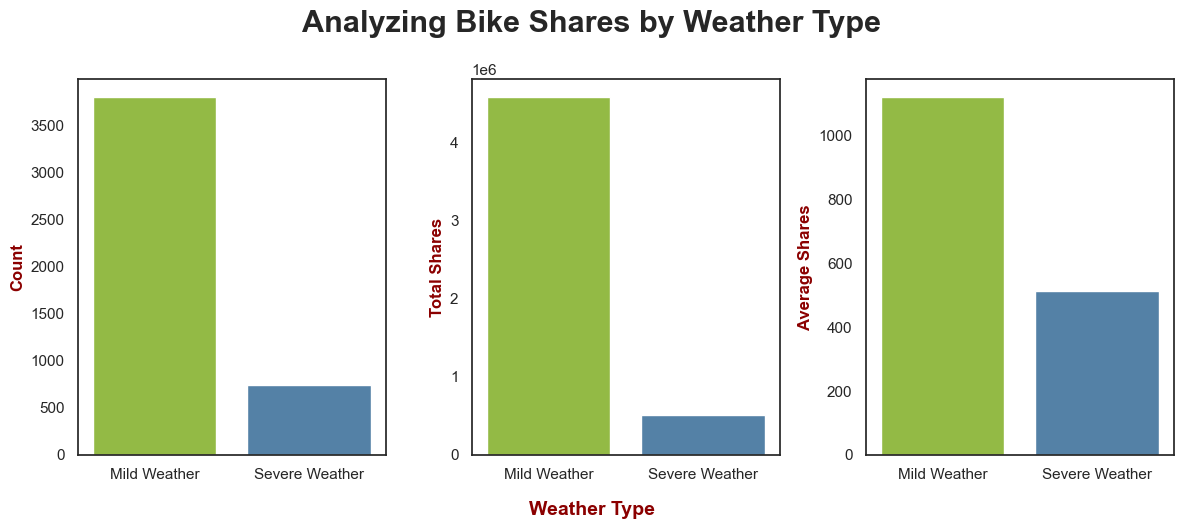

In [227]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

x = grp_weather_type['Weather Type']
y1 = grp_weather_type['Number of Shares']
y2 = grp_weather_type['Total Shares']
y3 = grp_weather_type['Average Shares']

sns.barplot(x=x, y=y1, ax=ax[0], palette=['YellowGreen', 'SteelBlue'], hue=x)
sns.barplot(x=x, y=y2, ax=ax[1], palette=['YellowGreen', 'SteelBlue'], hue=x)
sns.barplot(x=x, y=y3, ax=ax[2], palette=['YellowGreen', 'SteelBlue'], hue=x)

ax[0].set_xlabel('')
ax[0].set_ylabel('Count', color='darkred', weight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('Total Shares', color='darkred', weight='bold')
ax[2].set_xlabel('')
ax[2].set_ylabel('Average Shares', color='darkred', weight='bold')

fig.text(0.5, -0.03, 'Weather Type', ha='center', 
         fontsize=14, weight='bold', color='darkred')

fig.suptitle('Analyzing Bike Shares by Weather Type', weight='bold', fontsize=22)

plt.tight_layout()

### Conclusion 4: Hour Effect

📢 When we look at the hourly bike shares one by one, we will see that there are two peaks. 8 am and 5 pm are most bike shared times. Consequently around of 8 am and 5 pm very important in terms of bike shares.

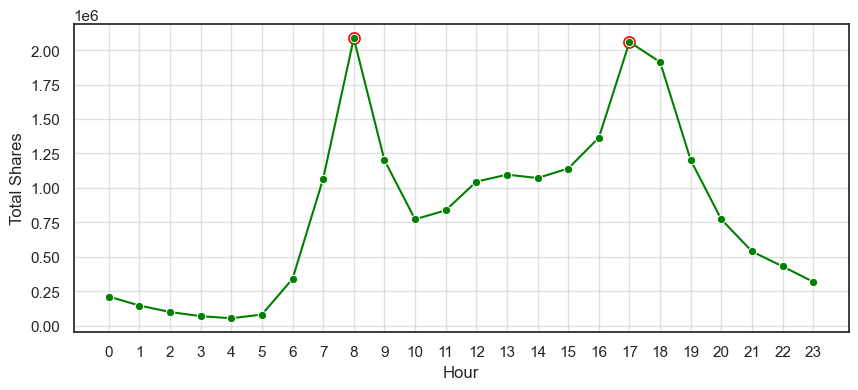

In [311]:
grp_hour = df.groupby('hour')['cnt'].agg(['count', 'sum', 'mean']).reset_index()
grp_hour.columns = ['Hour', 'Number of Shares', 'Total Shares', 'Average Shares']

new_x = [8, 17]
new_y = [2087164, 2059938]

plt.figure(figsize=(10, 4))
sns.lineplot(x=grp_hour['Hour'], y=grp_hour['Total Shares'], color='green', marker='o')
sns.scatterplot(x=new_x, y=new_y, color='red', marker='o', s=100)

plt.xticks(np.arange(0, 24))
plt.grid(alpha=0.6)
plt.show()

### BONUS

📢 There is a graph that give as a result of combine of weekend, seson and hours effect. We could see that summer-weekday-8 am and summer-weekday-5 pm are the best points for bike shares and also winter-weekend are the worst time also.

In [329]:
df_result = df.groupby(['is_weekend', 'season', 'hour'])['cnt'].agg(['count', 'sum', 'mean']).reset_index()
df_result['week_season'] = df_result['is_weekend'] + ' - ' + df_result['season']
df_result

,is_weekend,season,hour,count,sum,mean,week_season
0,Weekday,Fall,0,128,26997,210.914062,Weekday - Fall
1,Weekday,Fall,1,128,16427,128.335938,Weekday - Fall
2,Weekday,Fall,2,128,10489,81.945312,Weekday - Fall
3,Weekday,Fall,3,128,6703,52.367188,Weekday - Fall
4,Weekday,Fall,4,128,6768,52.875000,Weekday - Fall
...,...,...,...,...,...,...,...
187,Weekend,Winter,19,52,29810,573.269231,Weekend - Winter
188,Weekend,Winter,20,52,22840,439.230769,Weekend - Winter
189,Weekend,Winter,21,52,17431,335.211538,Weekend - Winter
190,Weekend,Winter,22,52,16440,316.153846,Weekend - Winter


In [339]:
weekday = df_result.loc[df_result['is_weekend'] == 'Weekday', :]
weekend = df_result.loc[df_result['is_weekend'] == 'Weekend', :]

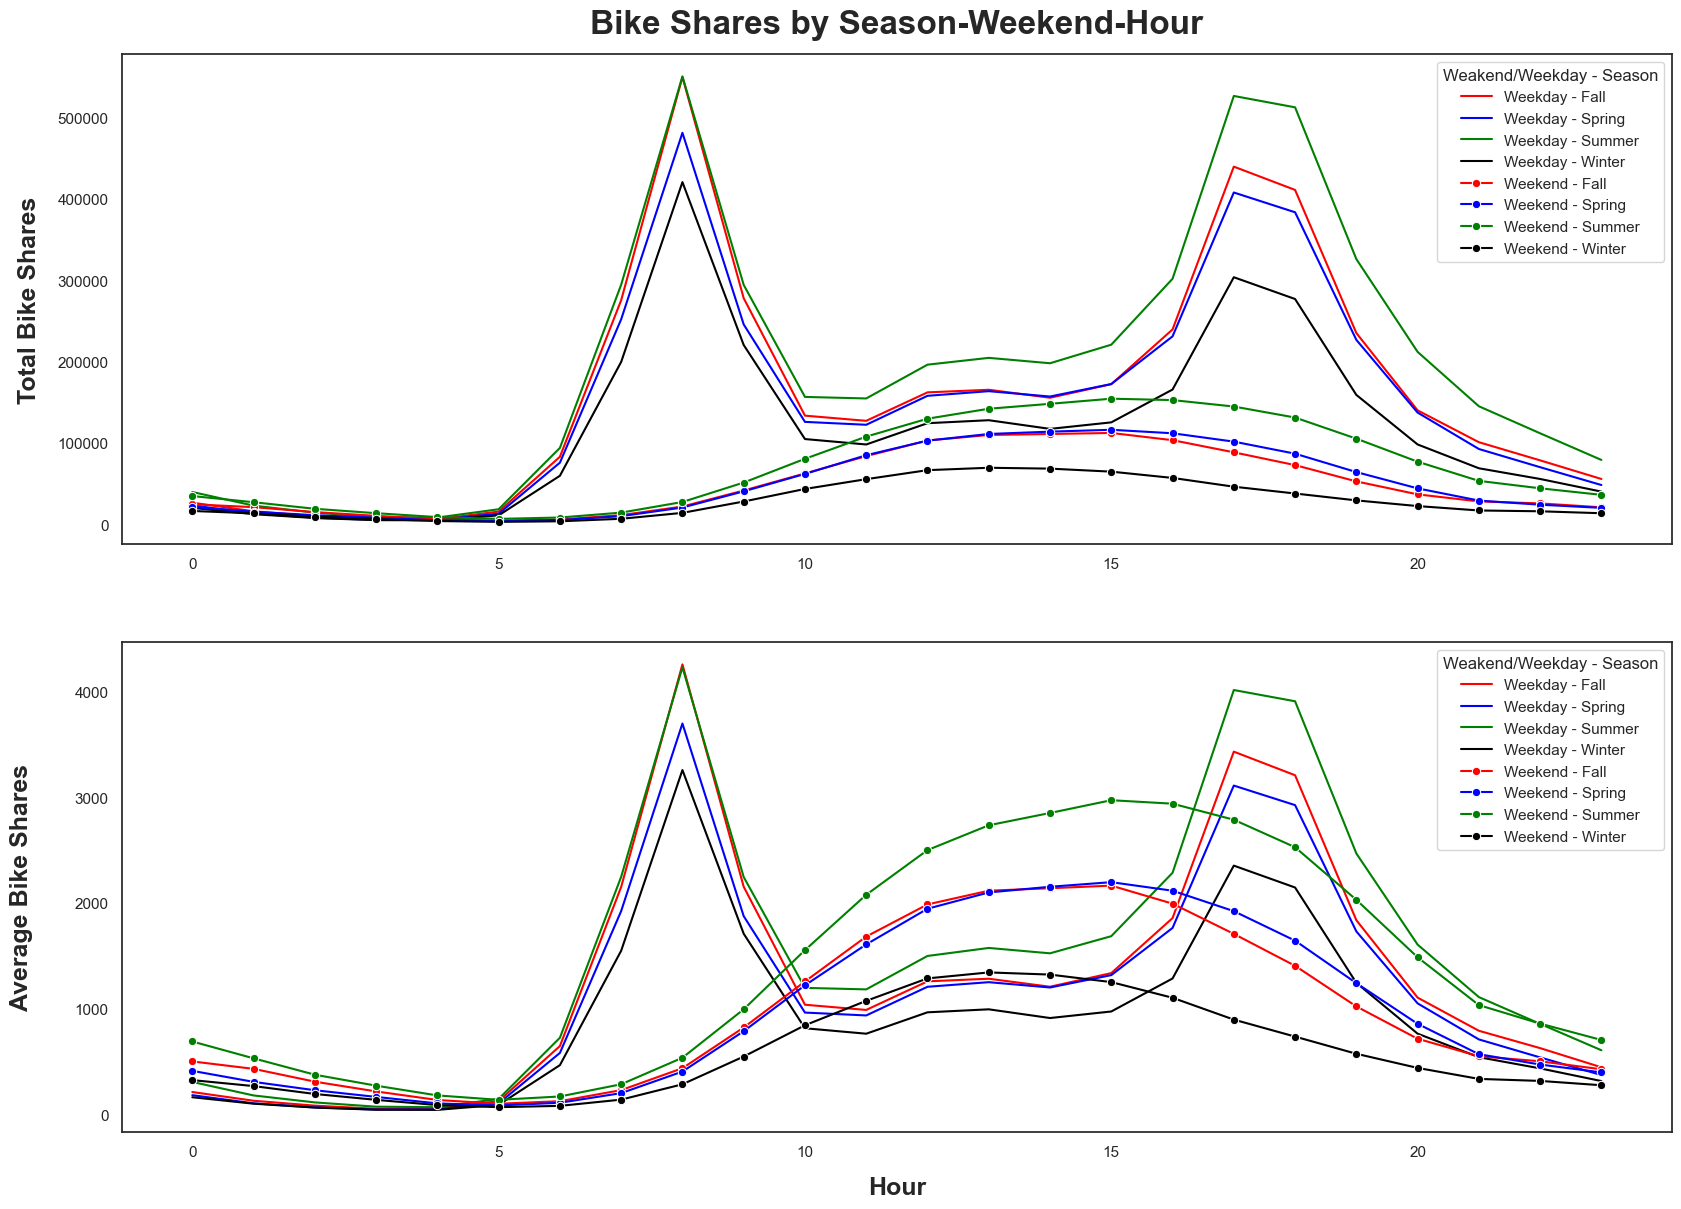

In [398]:
fig, ax = plt.subplots(2, 1, figsize=(20, 14))

sns.lineplot(data=weekday, x='hour', y='sum', hue='week_season', palette=['red', 'blue', 'green', 'black'], ax=ax[0])
sns.lineplot(data=weekend, x='hour', y='sum', hue='week_season', marker='o', legend=True, 
             palette=['red', 'blue', 'green', 'black'], ax=ax[0])

sns.lineplot(data=weekday, x='hour', y='mean', hue='week_season', palette=['red', 'blue', 'green', 'black'], ax=ax[1])
sns.lineplot(data=weekend, x='hour', y='mean', hue='week_season', marker='o', legend=True, 
             palette=['red', 'blue', 'green', 'black'], ax=ax[1])

ax[0].set_ylabel('Total Bike Shares', labelpad=12, fontsize=18, weight='bold')
ax[0].set_xlabel('')
ax[1].set_ylabel('Average Bike Shares', labelpad=30, fontsize=18, weight='bold')
ax[1].set_xlabel('Hour', labelpad=12, fontsize=18, weight='bold')

ax[0].set_title('Bike Shares by Season-Weekend-Hour', pad=15, fontsize=24, weight='bold')
ax[0].legend(title='Weakend/Weekday - Season')
ax[1].legend(title='Weakend/Weekday - Season')
plt.show()

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |